# Creation of MAD-X Input tables for CERN Proton Synchrotron zero dispersion lattice

## Quadrupole ramp tables defining the change to zero dispersion optics for a given tune (defined by a global KF and KD value)

In [1]:
import os
import numpy as np
from math import log10, floor

import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import matplotlib.gridspec as gridspec

In [2]:
def round_sig(x, sig=4):
    return round(x, sig-int(floor(log10(abs(x))))-1)

In [3]:
def seq_start_to_end(n_vals, start, stop):
    n_mp = n_vals
    interval = (stop-start)/(n_mp-1)

    print('seq_start_to_end::interval = ', interval)

    positions = np.arange(start, stop+interval, interval)
    
    # First check - try rounding
    if len(positions) != n_vals:
        for i in sorted(range(10), reverse=True):
            interval = round_sig((stop-start)/(n_mp-1),5) 
            positions = np.arange(start, stop+interval, interval)
            
            if len(positions) == n_vals: break
        print('seq_start_to_end::WARNING: output sequence length != input, rounding leads to ', len(positions))
    
    # Second check - 
    if len(positions) != n_vals:
        cut = (stop-start)/((n_mp-1)*1E4)
        while len(positions) != n_vals:
            # If our interval is too large
            if len(positions) < n_vals:                
                interval = (stop-start)/(n_mp-1) - cut
                positions = np.arange(start, stop+interval, interval)                
            else:                 
                interval = (stop-start)/(n_mp-1) + cut
                positions = np.arange(start, stop+interval, interval)
            
        print('seq_start_to_end::WARNING: output sequence length != input, cutting leads to ', len(positions))
      
    return positions

In [4]:
# 875 turns = 2 ms
turn_time = 2000./875 #microseconds
print '1 PS turn ~ ', turn_time, 'microseconds (10^{-6} s)'

1 PS turn ~  2.28571428571 microseconds (10^{-6} s)


In [5]:
print '500 PS turns ~ ', (500 * turn_time), 'microseconds (10^{-6} s)'
print '500 PS turns ~ ', round_sig((500 * turn_time)*1E-6), 'seconds'

500 PS turns ~  1142.85714286 microseconds (10^{-6} s)
500 PS turns ~  0.001143 seconds


In [6]:
print '5 ms ~ ',round_sig(5000./turn_time), ' turns'

5 ms ~  2188.0  turns


## Note that 'turns' on x-axis is arbitrary until converted into MAD-X/PTC units

In [7]:
# We want 500 turns ramp down, 500 turns  plateau, 500 turns ramp up

n_steps = 101

KF = -0.01606942838
KD = 0.0282773339

KQDW28_final = 0.0757297180705;
KQDW32_final = 0.0775756834198;
KQDN36_final = -0.0789023831646;
KQDN40_final = -0.105573371396;
KQDN46_final = 0.105573371396;

KQFW31_final = 0.0775756834198;
KQFN35_final = -0.0594659200772;
KQFN39_final = -0.0982846394342;
KQFN45_final = 0.0305545585327;
KQFN49_final = 0.0353049579112;

KQDW28_ramp_down = seq_start_to_end(n_steps, KD, KQDW28_final)
KQDW32_ramp_down = seq_start_to_end(n_steps, KD, KQDW32_final)
KQDN36_ramp_down = seq_start_to_end(n_steps, KD, KQDN36_final)
KQDN40_ramp_down = seq_start_to_end(n_steps, KD, KQDN40_final)
KQDN46_ramp_down = seq_start_to_end(n_steps, KD, KQDN46_final)

KQFW31_ramp_down = seq_start_to_end(n_steps, KF, KQFW31_final)
KQFN35_ramp_down = seq_start_to_end(n_steps, KF, KQFN35_final)
KQFN39_ramp_down = seq_start_to_end(n_steps, KF, KQFN39_final)
KQFN45_ramp_down = seq_start_to_end(n_steps, KF, KQFN45_final)
KQFN49_ramp_down = seq_start_to_end(n_steps, KF, KQFN49_final)

KQDW28_ramp_up = seq_start_to_end(n_steps, KQDW28_final, KD)
KQDW32_ramp_up = seq_start_to_end(n_steps, KQDW32_final, KD)
KQDN36_ramp_up = seq_start_to_end(n_steps, KQDN36_final, KD)
KQDN40_ramp_up = seq_start_to_end(n_steps, KQDN40_final, KD)
KQDN46_ramp_up = seq_start_to_end(n_steps, KQDN46_final, KD)

KQFW31_ramp_up = seq_start_to_end(n_steps, KQFW31_final, KF)
KQFN35_ramp_up = seq_start_to_end(n_steps, KQFN35_final, KF)
KQFN39_ramp_up = seq_start_to_end(n_steps, KQFN39_final, KF)
KQFN45_ramp_up = seq_start_to_end(n_steps, KQFN45_final, KF)
KQFN49_ramp_up = seq_start_to_end(n_steps, KQFN49_final, KF)

('seq_start_to_end::interval = ', 0.00047452384170499994)
('seq_start_to_end::WARNING: output sequence length != input, rounding leads to ', 102)
('seq_start_to_end::WARNING: output sequence length != input, cutting leads to ', 101)
('seq_start_to_end::interval = ', 0.000492983495198)
('seq_start_to_end::interval = ', -0.001071797170646)
('seq_start_to_end::WARNING: output sequence length != input, rounding leads to ', 101)
('seq_start_to_end::interval = ', -0.00133850705296)
('seq_start_to_end::interval = ', 0.0007729603749600001)
('seq_start_to_end::interval = ', 0.0009364511179980001)
('seq_start_to_end::interval = ', -0.000433964916972)
('seq_start_to_end::interval = ', -0.0008221521105420001)
('seq_start_to_end::interval = ', 0.00046623986912700004)
('seq_start_to_end::interval = ', 0.000513743862912)
('seq_start_to_end::WARNING: output sequence length != input, rounding leads to ', 102)
('seq_start_to_end::WARNING: output sequence length != input, cutting leads to ', 101)
('seq_s

In [8]:
print len(KQDW28_ramp_down)
print len(KQDW32_ramp_down)
print len(KQDN36_ramp_down)
print len(KQDN40_ramp_down)
print len(KQDN46_ramp_down)
print len(KQFW31_ramp_down)
print len(KQFN35_ramp_down)
print len(KQFN39_ramp_down)
print len(KQFN45_ramp_down)
print len(KQFN49_ramp_down)

print len(KQDW28_ramp_up)
print len(KQDW32_ramp_up)
print len(KQDN36_ramp_up)
print len(KQDN40_ramp_up)
print len(KQDN46_ramp_up)
print len(KQFW31_ramp_up)
print len(KQFN35_ramp_up)
print len(KQFN39_ramp_up)
print len(KQFN45_ramp_up)
print len(KQFN49_ramp_up)

101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101
101


In [9]:
plt.rcParams['figure.figsize'] = [5.0, 4.5]
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

plt.rcParams['axes.titlesize'] = 10
plt.rcParams['axes.labelsize'] = 14

plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

plt.rcParams['font.size'] = 10
plt.rcParams['legend.fontsize'] = 4

plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 5

save_folder = 'Ramp_Plots/'


In [10]:
len(KQDW28_ramp_up)

101

In [11]:
len(KQDW28_ramp_down)

101

('seq_start_to_end::interval = ', 5.0)
('seq_start_to_end::interval = ', 5.0)
('seq_start_to_end::interval = ', 5.0)
('seq_start_to_end::interval = ', 5.0)
('seq_start_to_end::interval = ', 5.0)
('seq_start_to_end::interval = ', 5.0)
('seq_start_to_end::interval = ', 5.0)
('seq_start_to_end::interval = ', 5.0)
('seq_start_to_end::interval = ', 5.0)
('seq_start_to_end::interval = ', 5.0)
('seq_start_to_end::interval = ', 5.0)
('seq_start_to_end::interval = ', 5.0)
('seq_start_to_end::interval = ', 5.0)
('seq_start_to_end::interval = ', 5.0)
('seq_start_to_end::interval = ', 5.0)
('seq_start_to_end::interval = ', 5.0)
('seq_start_to_end::interval = ', 5.0)
('seq_start_to_end::interval = ', 5.0)
('seq_start_to_end::interval = ', 5.0)
('seq_start_to_end::interval = ', 5.0)


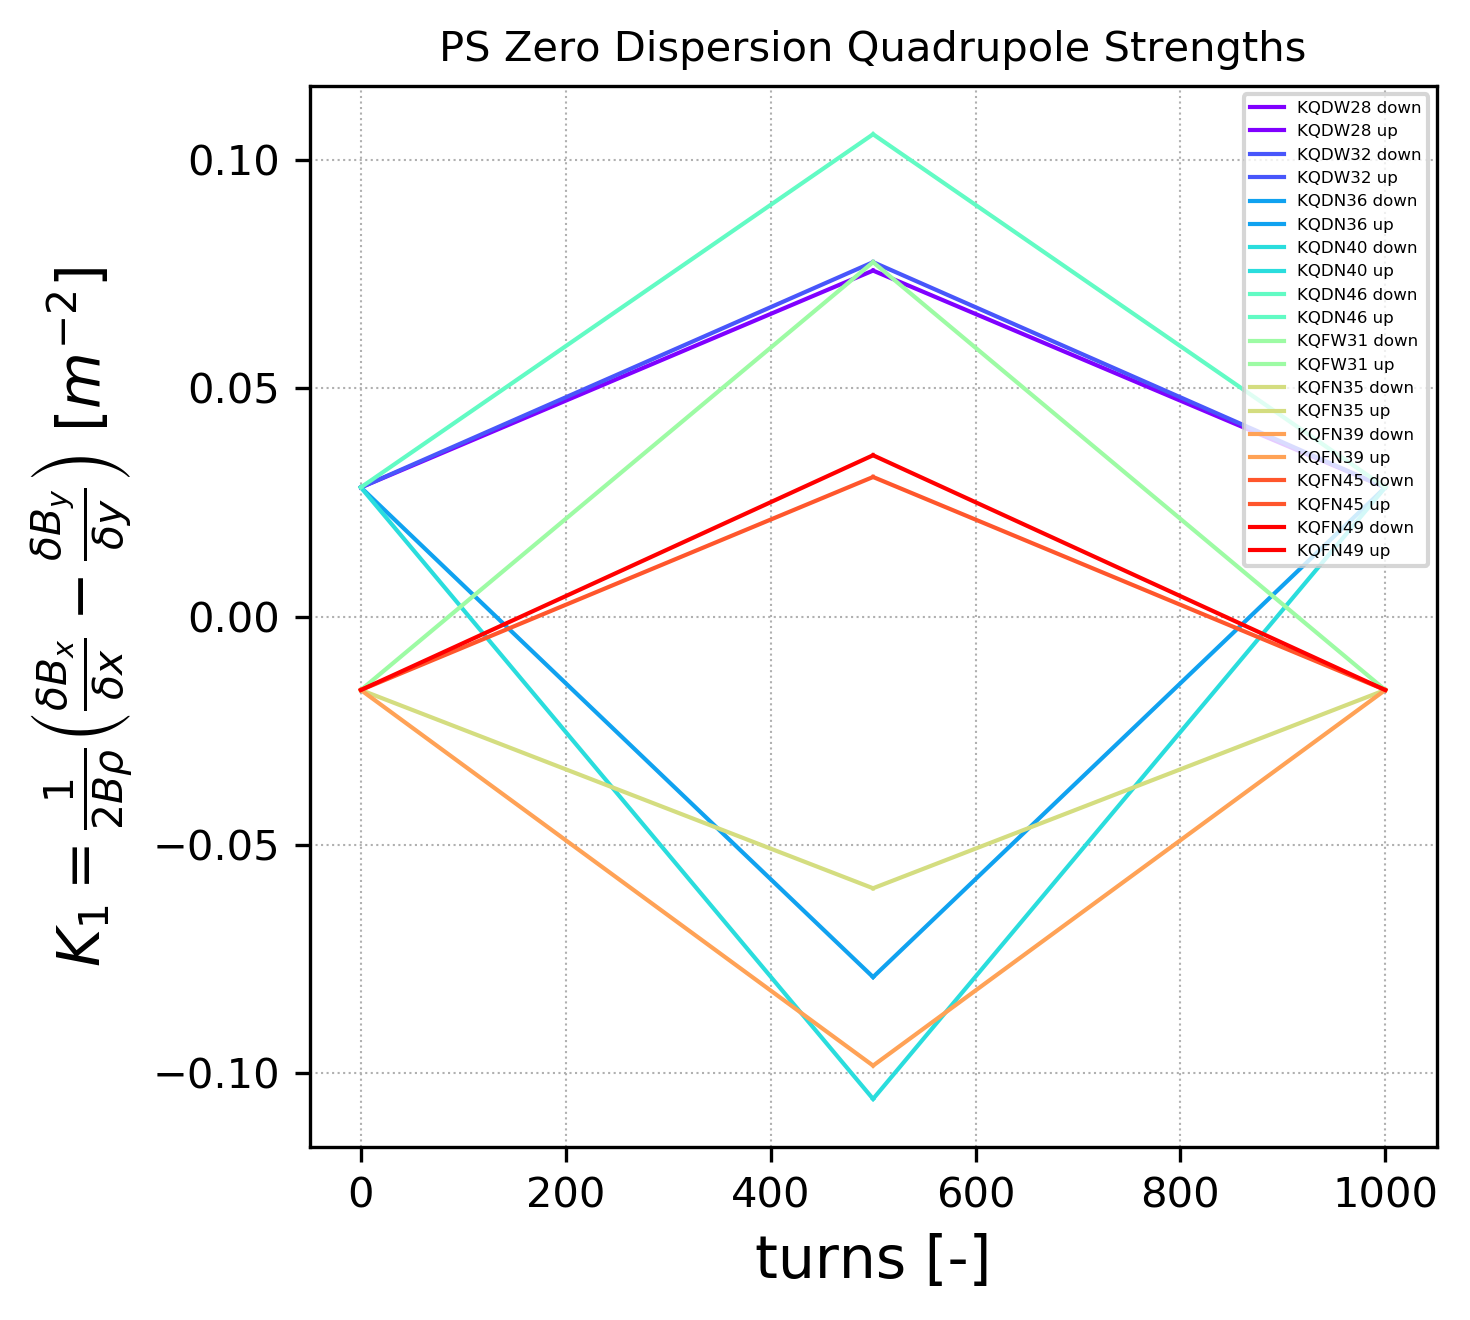

In [13]:
fig, ax1 = plt.subplots();
ax1.set_title('PS Zero Dispersion Quadrupole Strengths')
savename = save_folder + 'test.png'

colors = cm.rainbow(np.linspace(0, 1, 10))

x1 = seq_start_to_end(len(KQDW28_ramp_down), 0., 500.)
x2 = seq_start_to_end(len(KQDW28_ramp_up), 500., 1000.)
ax1.plot(x1, KQDW28_ramp_down, label='KQDW28 down', color=colors[0]);
ax1.plot(x2, KQDW28_ramp_up, label='KQDW28 up', color=colors[0]);

x1 = seq_start_to_end(len(KQDW32_ramp_down), 0., 500.)
x2 = seq_start_to_end(len(KQDW32_ramp_up), 500., 1000.)
ax1.plot(x1, KQDW32_ramp_down, label='KQDW32 down', color=colors[1]);
ax1.plot(x2, KQDW32_ramp_up, label='KQDW32 up', color=colors[1]);

x1 = seq_start_to_end(len(KQDN36_ramp_down), 0., 500.)
x2 = seq_start_to_end(len(KQDN36_ramp_up), 500., 1000.)
ax1.plot(x1, KQDN36_ramp_down, label='KQDN36 down', color=colors[2]);
ax1.plot(x2, KQDN36_ramp_up, label='KQDN36 up', color=colors[2]);

x1 = seq_start_to_end(len(KQDN40_ramp_down), 0., 500.)
x2 = seq_start_to_end(len(KQDN40_ramp_up), 500., 1000.)
ax1.plot(x1, KQDN40_ramp_down, label='KQDN40 down', color=colors[3]);
ax1.plot(x2, KQDN40_ramp_up, label='KQDN40 up', color=colors[3]);

x1 = seq_start_to_end(len(KQDN46_ramp_down), 0., 500.)
x2 = seq_start_to_end(len(KQDN46_ramp_up), 500., 1000.)
ax1.plot(x1, KQDN46_ramp_down, label='KQDN46 down', color=colors[4]);
ax1.plot(x2, KQDN46_ramp_up, label='KQDN46 up', color=colors[4]);


x1 = seq_start_to_end(len(KQFW31_ramp_down), 0., 500.)
x2 = seq_start_to_end(len(KQFW31_ramp_up), 500., 1000.)
ax1.plot(x1, KQFW31_ramp_down, label='KQFW31 down', color=colors[5]);
ax1.plot(x2, KQFW31_ramp_up, label='KQFW31 up', color=colors[5]);

x1 = seq_start_to_end(len(KQFN35_ramp_down), 0., 500.)
x2 = seq_start_to_end(len(KQFN35_ramp_up), 500., 1000.)
ax1.plot(x1, KQFN35_ramp_down, label='KQFN35 down', color=colors[6]);
ax1.plot(x2, KQFN35_ramp_up, label='KQFN35 up', color=colors[6]);

x1 = seq_start_to_end(len(KQFN39_ramp_down), 0., 500.)
x2 = seq_start_to_end(len(KQFN39_ramp_up), 500., 1000.)
ax1.plot(x1, KQFN39_ramp_down, label='KQFN39 down', color=colors[7]);
ax1.plot(x2, KQFN39_ramp_up, label='KQFN39 up', color=colors[7]);

x1 = seq_start_to_end(len(KQFN45_ramp_down), 0., 500.)
x2 = seq_start_to_end(len(KQFN45_ramp_up), 500., 1000.)
ax1.plot(x1, KQFN45_ramp_down, label='KQFN45 down', color=colors[8]);
ax1.plot(x2, KQFN45_ramp_up, label='KQFN45 up', color=colors[8]);

x1 = seq_start_to_end(len(KQFN49_ramp_down), 0., 500.)
x2 = seq_start_to_end(len(KQFN49_ramp_up), 500., 1000.)
ax1.plot(x1, KQFN49_ramp_down, label='KQFN49 down', color=colors[9]);
ax1.plot(x2, KQFN49_ramp_up, label='KQFN49 up', color=colors[9]);

ax1.set_xlabel('turns [-]')
ax1.set_ylabel(r'$K_1 = \frac{1}{2 B \rho} \left(\frac{\delta B_x}{\delta x} - \frac{\delta B_y}{\delta y}\right)$ [$m^{-2}$]')


ax1.legend(loc=1)
ax1.grid(which='both', ls=':', lw=0.5)

plt.tight_layout()
fig.savefig(savename)

# Make 2 sets of ramp parameters 

## First case: 2000 turns total (500 turns static for SC effects)

In [14]:
KQDW28_20 = np.concatenate((np.ones(len(KQDW28_ramp_down))*KD, KQDW28_ramp_down, np.ones(len(KQDW28_ramp_down))*KQDW28_ramp_down[-1], KQDW28_ramp_up), axis=0)
KQDW32_20 = np.concatenate((np.ones(len(KQDW32_ramp_down))*KD, KQDW32_ramp_down, np.ones(len(KQDW32_ramp_down))*KQDW32_ramp_down[-1], KQDW32_ramp_up), axis=0)
KQDN36_20 = np.concatenate((np.ones(len(KQDN36_ramp_down))*KD, KQDN36_ramp_down, np.ones(len(KQDN36_ramp_down))*KQDN36_ramp_down[-1], KQDN36_ramp_up), axis=0)
KQDN40_20 = np.concatenate((np.ones(len(KQDN40_ramp_down))*KD, KQDN40_ramp_down, np.ones(len(KQDN40_ramp_down))*KQDN40_ramp_down[-1], KQDN40_ramp_up), axis=0)
KQDN46_20 = np.concatenate((np.ones(len(KQDN46_ramp_down))*KD, KQDN46_ramp_down, np.ones(len(KQDN46_ramp_down))*KQDN46_ramp_down[-1], KQDN46_ramp_up), axis=0)

KQFW31_20 = np.concatenate((np.ones(len(KQFW31_ramp_down))*KF, KQFW31_ramp_down, np.ones(len(KQFW31_ramp_down))*KQFW31_ramp_down[-1], KQFW31_ramp_up), axis=0)
KQFN35_20 = np.concatenate((np.ones(len(KQFN35_ramp_down))*KF, KQFN35_ramp_down, np.ones(len(KQFN35_ramp_down))*KQFN35_ramp_down[-1], KQFN35_ramp_up), axis=0)
KQFN39_20 = np.concatenate((np.ones(len(KQFN39_ramp_down))*KF, KQFN39_ramp_down, np.ones(len(KQFN39_ramp_down))*KQFN39_ramp_down[-1], KQFN39_ramp_up), axis=0)
KQFN45_20 = np.concatenate((np.ones(len(KQFN45_ramp_down))*KF, KQFN45_ramp_down, np.ones(len(KQFN45_ramp_down))*KQFN45_ramp_down[-1], KQFN45_ramp_up), axis=0)
KQFN49_20 = np.concatenate((np.ones(len(KQFN49_ramp_down))*KF, KQFN49_ramp_down, np.ones(len(KQFN49_ramp_down))*KQFN49_ramp_down[-1], KQFN49_ramp_up), axis=0)

In [15]:
print len(KQDW28_20)
print len(KQDW32_20)
print len(KQDN36_20)
print len(KQDN40_20)
print len(KQDN46_20)
print len(KQFW31_20)
print len(KQFN35_20)
print len(KQFN39_20)
print len(KQFN45_20)
print len(KQFN49_20)

404
404
404
404
404
404
404
404
404
404


('seq_start_to_end::interval = ', 4.962779156327543)
('seq_start_to_end::interval = ', 4.962779156327543)
('seq_start_to_end::interval = ', 4.962779156327543)
('seq_start_to_end::interval = ', 4.962779156327543)
('seq_start_to_end::interval = ', 4.962779156327543)
('seq_start_to_end::interval = ', 4.962779156327543)
('seq_start_to_end::interval = ', 4.962779156327543)
('seq_start_to_end::interval = ', 4.962779156327543)
('seq_start_to_end::interval = ', 4.962779156327543)
('seq_start_to_end::interval = ', 4.962779156327543)


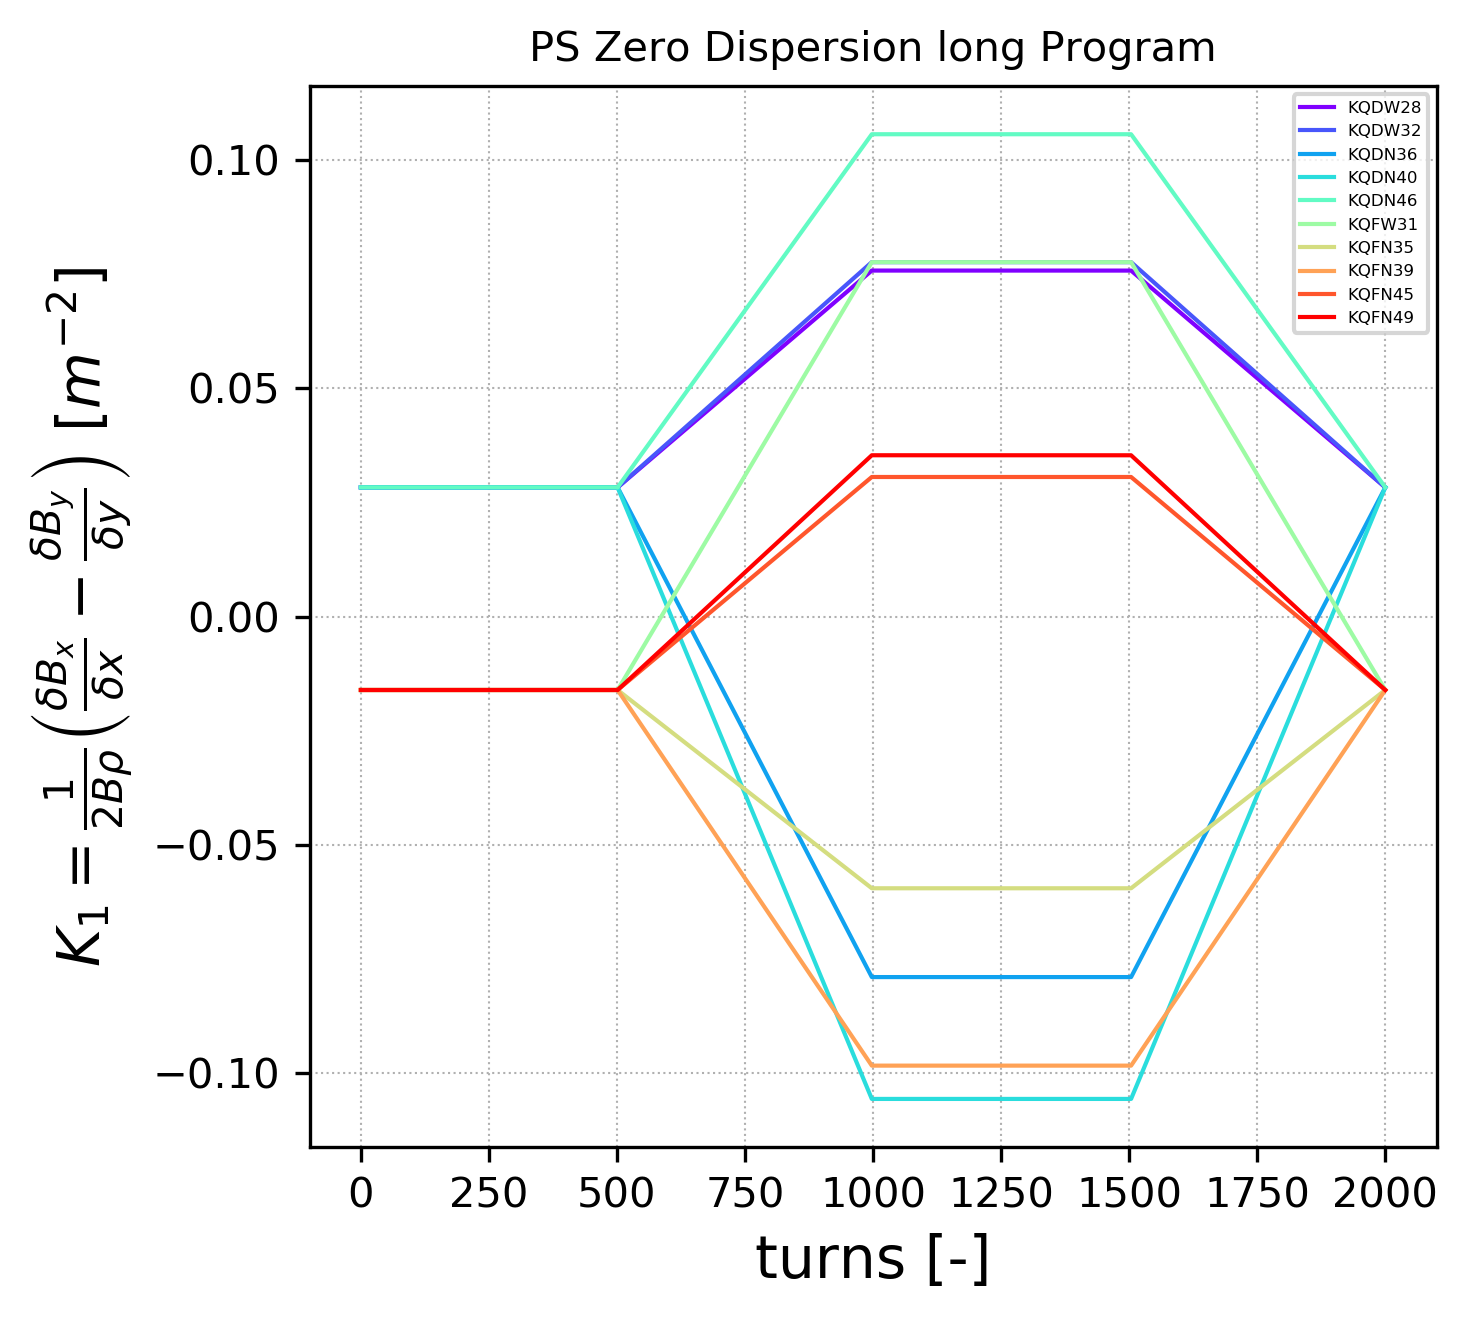

In [16]:
fig, ax1 = plt.subplots();
ax1.set_title('PS Zero Dispersion long Program')
savename = save_folder + 'long_program.png'

colors = cm.rainbow(np.linspace(0, 1, 10))

x1 = seq_start_to_end(len(KQDW28_20), 0., 2000.)
ax1.plot(x1, KQDW28_20, label='KQDW28', color=colors[0]);

x1 = seq_start_to_end(len(KQDW32_20), 0., 2000.)
ax1.plot(x1, KQDW32_20, label='KQDW32', color=colors[1]);

x1 = seq_start_to_end(len(KQDN36_20), 0., 2000.)
ax1.plot(x1, KQDN36_20, label='KQDN36', color=colors[2]);

x1 = seq_start_to_end(len(KQDN40_20), 0., 2000.)
ax1.plot(x1, KQDN40_20, label='KQDN40', color=colors[3]);

x1 = seq_start_to_end(len(KQDN46_20), 0., 2000.)
ax1.plot(x1, KQDN46_20, label='KQDN46', color=colors[4]);

x1 = seq_start_to_end(len(KQFW31_20), 0., 2000.)
ax1.plot(x1, KQFW31_20, label='KQFW31', color=colors[5]);

x1 = seq_start_to_end(len(KQFN35_20), 0., 2000.)
ax1.plot(x1, KQFN35_20, label='KQFN35', color=colors[6]);

x1 = seq_start_to_end(len(KQFN39_20), 0., 2000.)
ax1.plot(x1, KQFN39_20, label='KQFN39', color=colors[7]);

x1 = seq_start_to_end(len(KQFN45_20), 0., 2000.)
ax1.plot(x1, KQFN45_20, label='KQFN45', color=colors[8]);

x1 = seq_start_to_end(len(KQFN49_20), 0., 2000.)
ax1.plot(x1, KQFN49_20, label='KQFN49', color=colors[9]);

ax1.set_xlabel('turns [-]')
ax1.set_ylabel(r'$K_1 = \frac{1}{2 B \rho} \left(\frac{\delta B_x}{\delta x} - \frac{\delta B_y}{\delta y}\right)$ [$m^{-2}$]')


ax1.legend(loc=1)
ax1.grid(which='both', ls=':', lw=0.5)

plt.tight_layout()
fig.savefig(savename)

## Write to file: run this cell twice 

In [20]:
print KQDW28_20

[0.02827733 0.02827733 0.02827733 0.02827733 0.02827733 0.02827733
 0.02827733 0.02827733 0.02827733 0.02827733 0.02827733 0.02827733
 0.02827733 0.02827733 0.02827733 0.02827733 0.02827733 0.02827733
 0.02827733 0.02827733 0.02827733 0.02827733 0.02827733 0.02827733
 0.02827733 0.02827733 0.02827733 0.02827733 0.02827733 0.02827733
 0.02827733 0.02827733 0.02827733 0.02827733 0.02827733 0.02827733
 0.02827733 0.02827733 0.02827733 0.02827733 0.02827733 0.02827733
 0.02827733 0.02827733 0.02827733 0.02827733 0.02827733 0.02827733
 0.02827733 0.02827733 0.02827733 0.02827733 0.02827733 0.02827733
 0.02827733 0.02827733 0.02827733 0.02827733 0.02827733 0.02827733
 0.02827733 0.02827733 0.02827733 0.02827733 0.02827733 0.02827733
 0.02827733 0.02827733 0.02827733 0.02827733 0.02827733 0.02827733
 0.02827733 0.02827733 0.02827733 0.02827733 0.02827733 0.02827733
 0.02827733 0.02827733 0.02827733 0.02827733 0.02827733 0.02827733
 0.02827733 0.02827733 0.02827733 0.02827733 0.02827733 0.0282

In [24]:
write_file = True

output_file = "ZERO_DISP_20.tfs"

if write_file:
    f = open(output_file,"w")

    header = "@ NAME             %08s \"LEQTABLE\"\n@ TYPE             %04s \"USER\"\n@ TITLE            %03s \"LEQ\"\n@ ORIGIN           %16s \"5.04.02 Linux 64\"\n@ DATE             %08s \"16/04/20\"\n@ TIME             %08s \"12.00.00\"\n"

    f.write(header)
    f.write('*'+' '.join(map(lambda i: i.rjust(18), ['STEP', 'KQD_W28', 'KQD_W32', 'KQD_N36', 'KQD_N40', 'KQD_N46', 'KQF_W31', 'KQF_N35', 'KQF_N39', 'KQF_N45', 'KQF_N49'])) + '\n')
    f.write('$'+' '.join(map(lambda i: i.rjust(18), ['%le', '%le', '%le', '%le','%le', '%le', '%le', '%le', '%le','%le', '%le'])) + '\n')
   
    x = seq_start_to_end((len(KQDW28_20)), 0., 2000.)
    for i in xrange(0, len(KQDW28_20)):
        print i
        f.write(' '+' '.join(map(lambda i: ('%1.4e'%i).rjust(18), [x[i], KQDW28_20[i], KQDW32_20[i], KQDN36_20[i], KQDN40_20[i], KQDN46_20[i], KQFW31_20[i], KQFN35_20[i], KQFN39_20[i], KQFN45_20[i], KQFN49_20[i]])) + '\n')
        
        #f.write(' '+' '.join(map(lambda i: ('%1.4e'%i).rjust(18), [x[i], BSS_max*np.cos(steps[i]), bsw40*np.sin(steps[i]), bsw42*np.sin(steps[i]), bsw43*np.sin(steps[i]), bsw44*np.sin(steps[i])])) + '\n')



('seq_start_to_end::interval = ', 4.962779156327543)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
2

## Second case: 1500 turns total (immediate ramp down to 0-Dispersion)

In [180]:
KQDW28_15 = np.concatenate((KQDW28_ramp_down, np.ones(len(KQDW28_ramp_down))*KQDW28_ramp_down[-1], KQDW28_ramp_up), axis=0)
KQDW32_15 = np.concatenate((KQDW32_ramp_down, np.ones(len(KQDW32_ramp_down))*KQDW32_ramp_down[-1], KQDW32_ramp_up), axis=0)
KQDN36_15 = np.concatenate((KQDN36_ramp_down, np.ones(len(KQDN36_ramp_down))*KQDN36_ramp_down[-1], KQDN36_ramp_up), axis=0)
KQDN40_15 = np.concatenate((KQDN40_ramp_down, np.ones(len(KQDN40_ramp_down))*KQDN40_ramp_down[-1], KQDN40_ramp_up), axis=0)
KQDN46_15 = np.concatenate((KQDN46_ramp_down, np.ones(len(KQDN46_ramp_down))*KQDN46_ramp_down[-1], KQDN46_ramp_up), axis=0)

KQFW31_15 = np.concatenate((KQFW31_ramp_down, np.ones(len(KQFW31_ramp_down))*KQFW31_ramp_down[-1], KQFW31_ramp_up), axis=0)
KQFN35_15 = np.concatenate((KQFN35_ramp_down, np.ones(len(KQFN35_ramp_down))*KQFN35_ramp_down[-1], KQFN35_ramp_up), axis=0)
KQFN39_15 = np.concatenate((KQFN39_ramp_down, np.ones(len(KQFN39_ramp_down))*KQFN39_ramp_down[-1], KQFN39_ramp_up), axis=0)
KQFN45_15 = np.concatenate((KQFN45_ramp_down, np.ones(len(KQFN45_ramp_down))*KQFN45_ramp_down[-1], KQFN45_ramp_up), axis=0)
KQFN49_15 = np.concatenate((KQFN49_ramp_down, np.ones(len(KQFN49_ramp_down))*KQFN49_ramp_down[-1], KQFN49_ramp_up), axis=0)

('seq_start_to_end::interval = ', 4.966887417218543)
('seq_start_to_end::interval = ', 4.966887417218543)
('seq_start_to_end::interval = ', 4.966887417218543)
('seq_start_to_end::interval = ', 4.966887417218543)
('seq_start_to_end::interval = ', 4.966887417218543)
('seq_start_to_end::interval = ', 4.966887417218543)
('seq_start_to_end::interval = ', 4.966887417218543)
('seq_start_to_end::interval = ', 4.966887417218543)
('seq_start_to_end::interval = ', 4.966887417218543)
('seq_start_to_end::interval = ', 4.966887417218543)


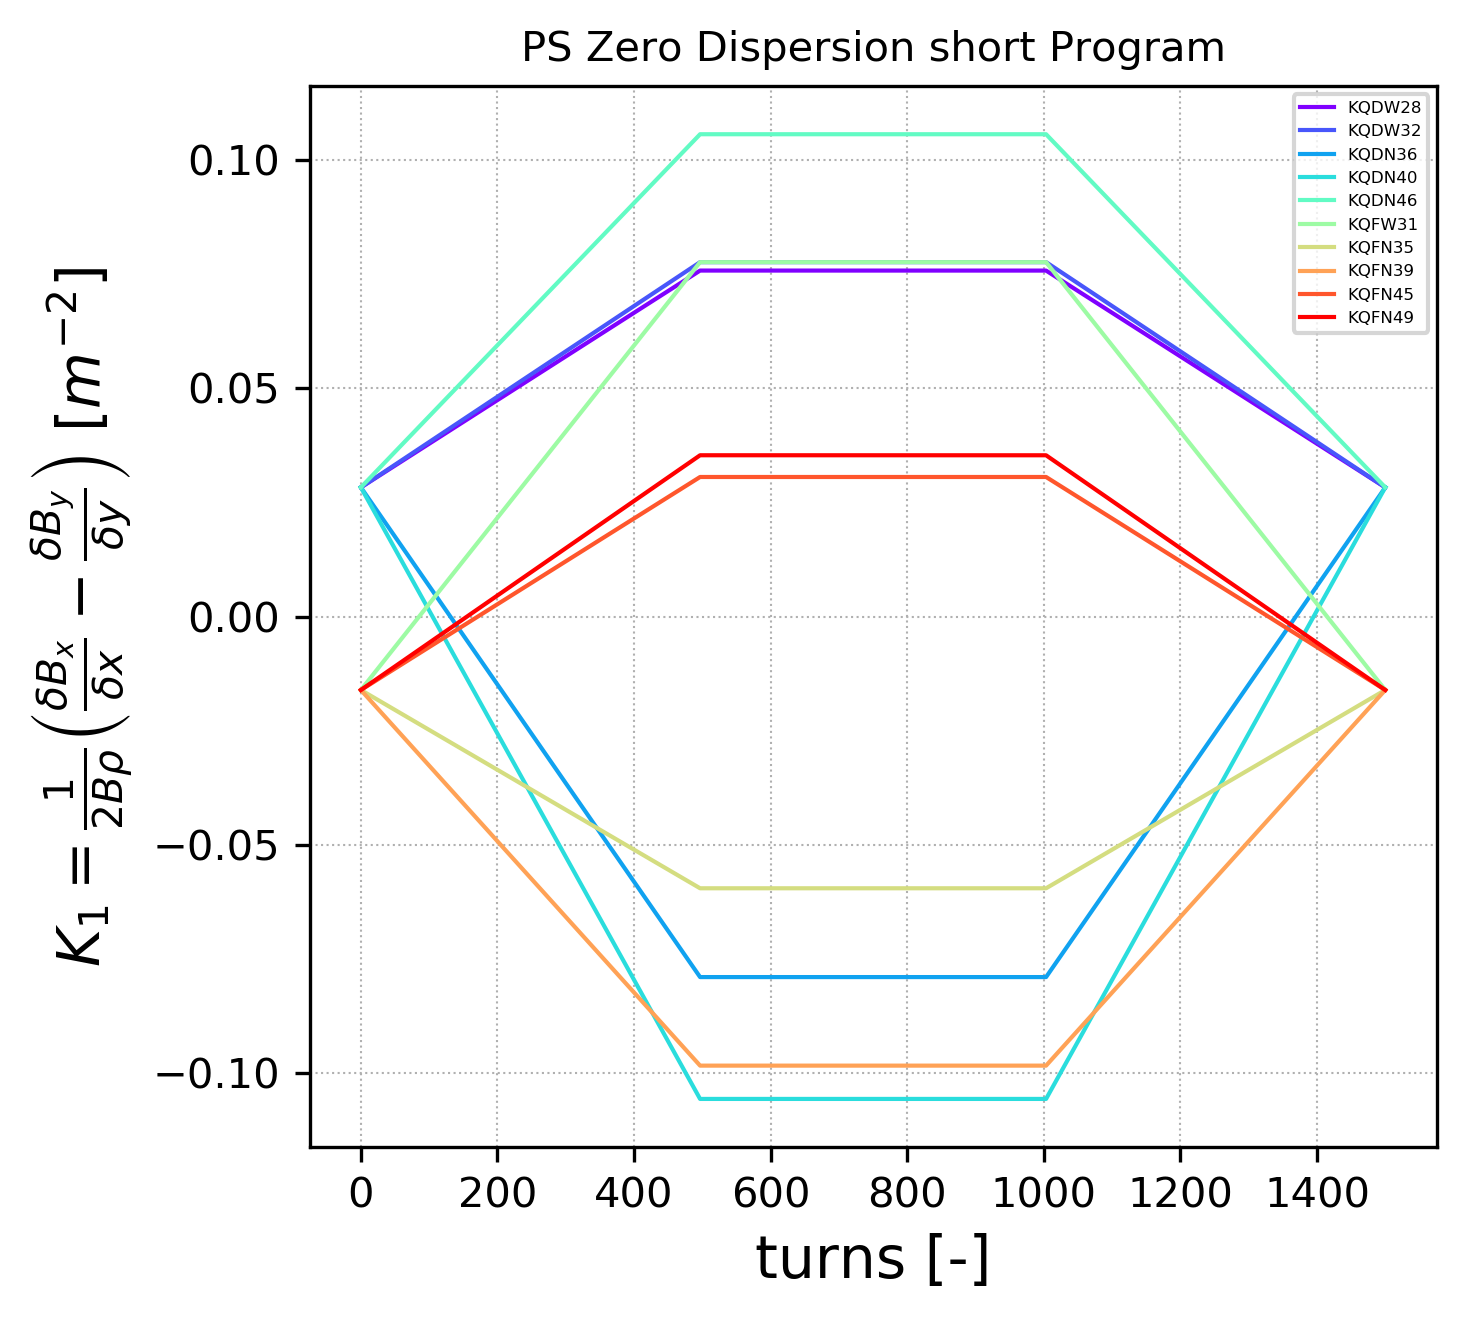

In [181]:
fig, ax1 = plt.subplots();
ax1.set_title('PS Zero Dispersion short Program')
savename = save_folder + 'short_program.png'

colors = cm.rainbow(np.linspace(0, 1, 10))

x1 = seq_start_to_end(len(KQDW28_15), 0., 1500.)
ax1.plot(x1, KQDW28_15, label='KQDW28', color=colors[0]);

x1 = seq_start_to_end(len(KQDW32_15), 0., 1500.)
ax1.plot(x1, KQDW32_15, label='KQDW32', color=colors[1]);

x1 = seq_start_to_end(len(KQDN36_15), 0., 1500.)
ax1.plot(x1, KQDN36_15, label='KQDN36', color=colors[2]);

x1 = seq_start_to_end(len(KQDN40_15), 0., 1500.)
ax1.plot(x1, KQDN40_15, label='KQDN40', color=colors[3]);

x1 = seq_start_to_end(len(KQDN46_15), 0., 1500.)
ax1.plot(x1, KQDN46_15, label='KQDN46', color=colors[4]);

x1 = seq_start_to_end(len(KQFW31_15), 0., 1500.)
ax1.plot(x1, KQFW31_15, label='KQFW31', color=colors[5]);

x1 = seq_start_to_end(len(KQFN35_15), 0., 1500.)
ax1.plot(x1, KQFN35_15, label='KQFN35', color=colors[6]);

x1 = seq_start_to_end(len(KQFN39_15), 0., 1500.)
ax1.plot(x1, KQFN39_15, label='KQFN39', color=colors[7]);

x1 = seq_start_to_end(len(KQFN45_15), 0., 1500.)
ax1.plot(x1, KQFN45_15, label='KQFN45', color=colors[8]);

x1 = seq_start_to_end(len(KQFN49_15), 0., 1500.)
ax1.plot(x1, KQFN49_15, label='KQFN49', color=colors[9]);

ax1.set_xlabel('turns [-]')
ax1.set_ylabel(r'$K_1 = \frac{1}{2 B \rho} \left(\frac{\delta B_x}{\delta x} - \frac{\delta B_y}{\delta y}\right)$ [$m^{-2}$]')


ax1.legend(loc=1)
ax1.grid(which='both', ls=':', lw=0.5)

plt.tight_layout()
fig.savefig(savename)

## Write to file: run this cell twice 

In [183]:
write_file = True

output_file = "ZERO_DISP_15.tfs"

if write_file:
    f = open(output_file,"w")

    header = "@ NAME             %08s \"LEQTABLE\"\n@ TYPE             %04s \"USER\"\n@ TITLE            %03s \"LEQ\"\n@ ORIGIN           %16s \"5.04.02 Linux 64\"\n@ DATE             %08s \"16/04/20\"\n@ TIME             %08s \"12.00.00\"\n"

    f.write(header)
    f.write('*'+' '.join(map(lambda i: i.rjust(18), ['STEP', 'KQD_W28', 'KQD_W32', 'KQD_N36', 'KQD_N40', 'KQD_N46', 'KQF_W31', 'KQF_N35', 'KQF_N39', 'KQF_N45', 'KQF_N49'])) + '\n')
    f.write('$'+' '.join(map(lambda i: i.rjust(18), ['%le', '%le', '%le', '%le','%le', '%le', '%le', '%le', '%le','%le', '%le'])) + '\n')
   
    x = seq_start_to_end(len(KQDW28_15), 0., 1500.)
    for i in xrange(0,len(KQDW28_15)):
        f.write(' '+' '.join(map(lambda i: ('%1.4e'%i).rjust(18), [x[i], KQDW28_15[i], KQDW32_15[i], KQDN36_15[i], KQDN40_15[i], KQDN46_15[i], KQFW31_15[i], KQFN35_15[i], KQFN39_15[i], KQFN45_15[i], KQFN49_15[i]])) + '\n')
        
        #f.write(' '+' '.join(map(lambda i: ('%1.4e'%i).rjust(18), [x[i], BSS_max*np.cos(steps[i]), bsw40*np.sin(steps[i]), bsw42*np.sin(steps[i]), bsw43*np.sin(steps[i]), bsw44*np.sin(steps[i])])) + '\n')



('seq_start_to_end::interval = ', 4.966887417218543)
